In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.model_selection import cross_val_score 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
columns = ['Age','Workclass','fnlgwt','Education','Education Num','Marital Status','Occupation',
           'Relationship','Race','Sex','Capital Gain','Capital Loss','Hours/Week','Native Country','Target']
data=pd.read_csv('/Users/tanvirislamullash/Downloads/adult.data',header=None,names=columns)

In [3]:
data.head()

,Age,Workclass,fnlgwt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
test_data = pd.read_csv("/Users/tanvirislamullash/Downloads/adult.test", 
                        header = None, skiprows=1, na_values='?', sep=', ', engine='python', names=columns)
test_data.head()

,Age,Workclass,fnlgwt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native Country,Target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


In [5]:
train_data=data.copy()

In [6]:
train_data.shape

(32561, 15)

In [7]:
train_data.describe()

,Age,fnlgwt,Education Num,Capital Gain,Capital Loss,Hours/Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
train_data.isnull().sum()

Age               0
Workclass         0
fnlgwt            0
Education         0
Education Num     0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital Gain      0
Capital Loss      0
Hours/Week        0
Native Country    0
Target            0
dtype: int64

In [9]:
test_data.isnull().sum()

Age                 0
Workclass         963
fnlgwt              0
Education           0
Education Num       0
Marital Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Capital Gain        0
Capital Loss        0
Hours/Week          0
Native Country    274
Target              0
dtype: int64

### Change Target columns to zero and one

In [10]:
train_data['Outcome'] = train_data['Target'].apply(lambda x: 1 if x==' >50K' else 0)
test_data['Outcome'] = test_data['Target'].apply(lambda x: 1 if x==' >50K.' else 0)

### Visualization of Data

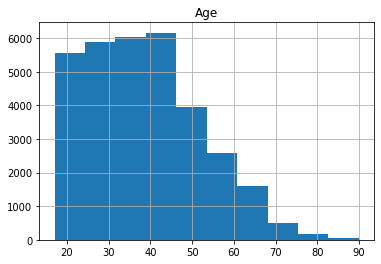

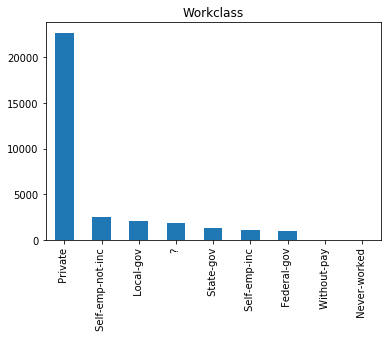

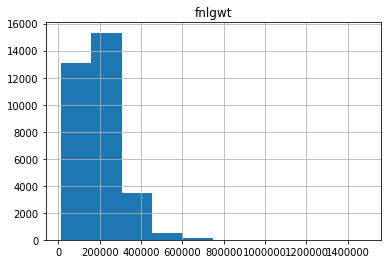

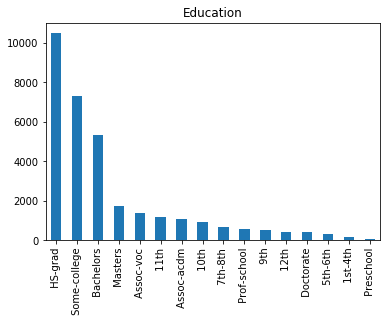

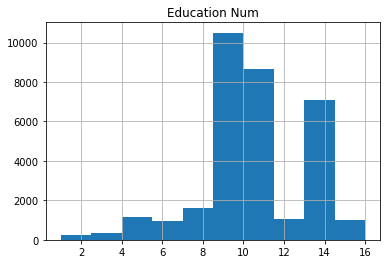

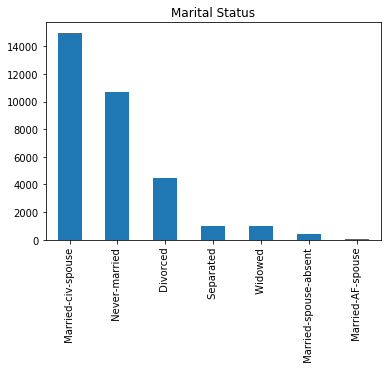

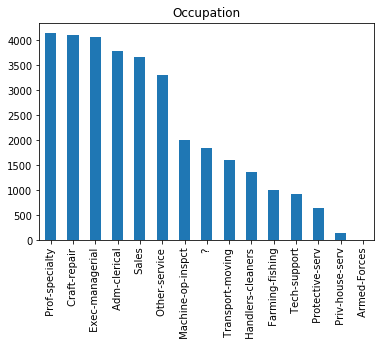

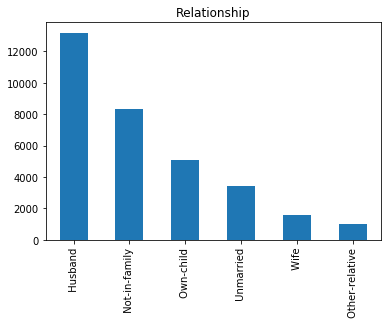

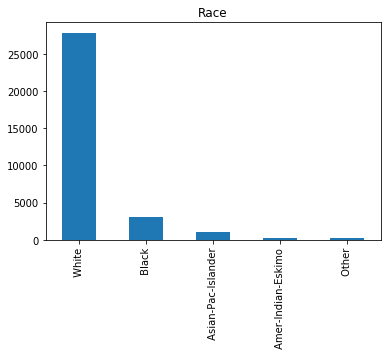

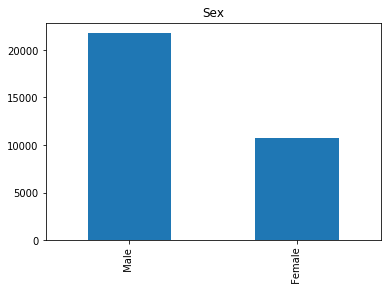

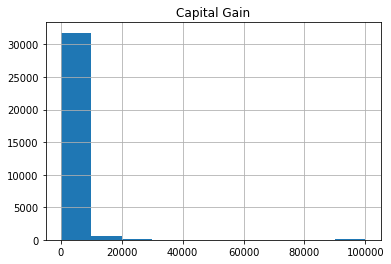

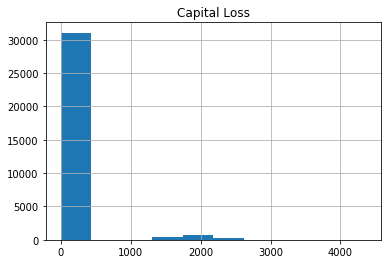

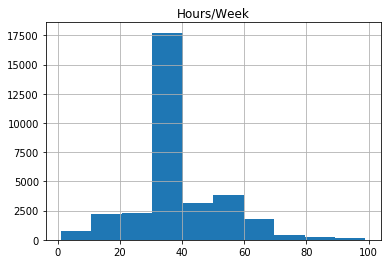

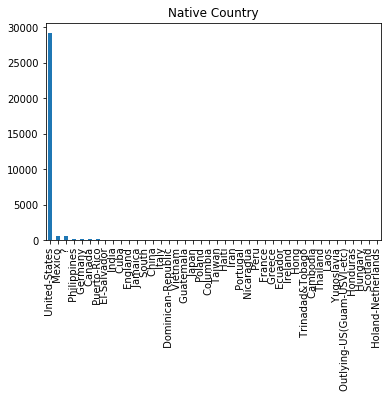

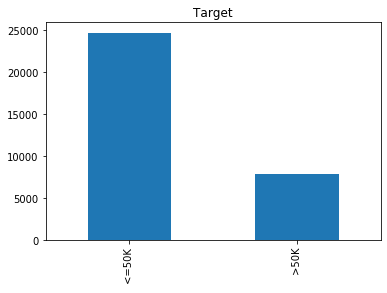

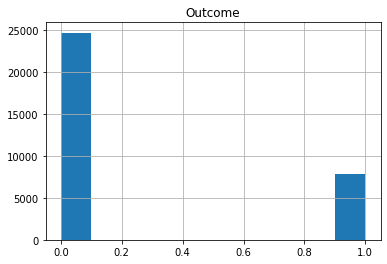

In [11]:
import matplotlib.pyplot as plt
import numpy as np
for column in train_data.columns:
    
    if train_data.dtypes[column] == np.object:
        train_data[column].value_counts().plot(kind="bar", title=column)
    else:
        train_data[column].hist()
        plt.title(column)
    plt.show()

### Drop Education columns as Education_num describes Education

In [12]:
train_data.drop('Education',axis=1,inplace=True)
test_data.drop('Education',axis=1,inplace=True)

In [13]:
train_data.Workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

### '?' Values coverting into NAN

In [14]:
train_data.replace(' ?', np.nan, inplace=True)
test_data.replace(' ?', np.nan, inplace=True)

## Filling  missing values with MODE Values

In [15]:
modes = train_data.mode().iloc[0]
train_data.fillna(modes, inplace=True)

In [16]:
modes = test_data.mode().iloc[0]
test_data.fillna(modes, inplace=True)

### Dropping Target Column 

In [17]:
train_data.drop('Target',axis=1,inplace=True)
test_data.drop('Target',axis=1,inplace=True)

In [18]:
train_data.head()

,Age,Workclass,fnlgwt,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native Country,Outcome
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


### Mapping

In [19]:
sex_mapping={' Male': 0, ' Female': 1}

train_data['Sex'] = train_data['Sex'].map(sex_mapping)
test_data['Sex'] = test_data['Sex'].map(sex_mapping)

In [20]:
race_mapping={' White':1, ' Black':2, ' Asian-Pac-Islander':3, ' Amer-Indian-Eskimo':4,
       ' Other':5}
train_data['Race'] = train_data['Race'].map(race_mapping)
test_data['Race'] = test_data['Race'].map(race_mapping)

##### Grouping Country

In [21]:
def native_country(country):
    if country in [' United-States', ' Cuba', ' 0']:
        return 'US'
    elif country in [' England', ' Germany', ' Canada', ' Italy', ' France', ' Greece', ' Philippines']:
        return 'Western'
    elif country in [' Mexico', ' Puerto-Rico', ' Honduras', ' Jamaica', ' Columbia', ' Laos', ' Portugal', ' Haiti',
                     ' Dominican-Republic', ' El-Salvador', ' Guatemala', ' Peru', 
                     ' Trinadad&Tobago', ' Outlying-US(Guam-USVI-etc)', ' Nicaragua', ' Vietnam', ' Holand-Netherlands' ]:
        return 'Poor' # no offence
    elif country in [' India', ' Iran', ' Cambodia', ' Taiwan', ' Japan', ' Yugoslavia', ' China', ' Hong']:
        return 'Eastern'
    elif country in [' South', ' Poland', ' Ireland', ' Hungary', ' Scotland', ' Thailand', ' Ecuador']:
        return 'Poland team'
    
    else: 
        return country    

In [22]:
train_data['Native Country'] = train_data['Native Country'].apply(native_country)
test_data['Native Country'] = test_data['Native Country'].apply(native_country)

In [23]:
train_data['Native Country'].unique()

array(['US', 'Poor', 'Eastern', 'Poland team', 'Western'], dtype=object)

In [24]:
country_mapping={'US':0, 'Poor':1, 'Eastern':2, 'Poland team':3,'Western':4}
train_data['Native Country'] = train_data['Native Country'].map(country_mapping)
test_data['Native Country'] = test_data['Native Country'].map(country_mapping)

### One Hot Encoding

##### Joing training and testing dataset

In [25]:
joint = pd.concat([train_data, test_data], axis=0)

In [26]:
categorical_features = joint.select_dtypes(include=['object']).axes[1]

for col in categorical_features:
    print (col, joint[col].nunique())



Workclass 16
Marital Status 14
Occupation 28
Relationship 12


In [27]:
for col in categorical_features:
    joint = pd.concat([joint, pd.get_dummies(joint[col], prefix=col, prefix_sep=':')], axis=1)
    joint.drop(col, axis=1, inplace=True)

In [28]:
joint.head()

,Age,fnlgwt,Education Num,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native Country,Outcome,...,Relationship: Other-relative,Relationship: Own-child,Relationship: Unmarried,Relationship: Wife,Relationship:Husband,Relationship:Not-in-family,Relationship:Other-relative,Relationship:Own-child,Relationship:Unmarried,Relationship:Wife
0,39,77516,13,1.0,0.0,2174,0,40,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,50,83311,13,1.0,0.0,0,0,13,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,38,215646,9,1.0,0.0,0,0,40,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,53,234721,7,2.0,0.0,0,0,40,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,28,338409,13,2.0,1.0,0,0,40,0.0,0,...,0,0,0,1,0,0,0,0,0,0


### Separate train and test data again

In [29]:
train = joint.head(train_data.shape[0])
test = joint.tail(test_data.shape[0])

In [30]:
train['fnlgwt'].describe()

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlgwt, dtype: float64

fnlgwt has numbers with big SD. So logarithmic transformation

In [31]:
train['fnlgwt'] = train['fnlgwt'].apply(lambda x: np.log1p(x))
test['fnlgwt'] = test['fnlgwt'].apply(lambda x: np.log1p(x))

In [32]:
train['fnlgwt'].describe()

count    32561.000000
mean        11.983778
std          0.630738
min          9.416216
25%         11.676981
50%         12.091542
75%         12.376035
max         14.210727
Name: fnlgwt, dtype: float64

### Building Models 

In [33]:
new_train_data=train.copy()
new_test_data=test.copy()

In [34]:
#separating data and target from TRAIN Data
train_data = new_train_data.drop('Outcome', axis=1)
train_target = new_train_data['Outcome']

#separating data and target from Test Data
test_data = new_test_data.drop('Outcome', axis=1)
test_target = new_test_data['Outcome']

scaler = StandardScaler()

#Scaling Train data
scaler.fit(train_data)
train_data = scaler.transform(train_data)

#Scaling Test Data
scaler.fit(test_data)
test_data = scaler.transform(test_data)

In [42]:
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, cross_val_predict
cv = KFold(5, random_state = 1)
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, 
                             classification_report, confusion_matrix)
Model = []
Accuracy = []
Precision = []
Recall = []
F1 = []
AUC = []


### Logistic regression

In [44]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
param_grid = {'C': [0.1, 0.4, 0.7, 1, 4, 7, 10],
              'solver':['sag','saga']
             
             }
grid1 = GridSearchCV(lr, param_grid, cv=cv).fit(train_data, train_target)
print("Param for Logistic Regression: ", grid1.best_params_)

Param for Logistic Regression:  {'C': 0.7, 'solver': 'saga'}


In [45]:
clf = grid1.best_estimator_
Model.append("Logistic Regression")
Accuracy.append(cross_val_score(clf, train_data, train_target, cv=cv, scoring='accuracy').mean())
Precision.append(cross_val_score(clf, train_data, train_target, cv=cv, scoring='precision').mean())
Recall.append(cross_val_score(clf, train_data, train_target, cv=cv, scoring='recall').mean())
F1.append(cross_val_score(clf, train_data, train_target, cv=cv, scoring='f1').mean())
AUC.append(cross_val_score(clf, train_data, train_target, cv=cv, scoring='roc_auc').mean())

### Decession Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy'],
    'max_depth' : [10,40,80,120,200],
    'max_features' : ['auto', 'sqrt', 'log2']}
grid2 = GridSearchCV(dtc, param_grid, cv=cv).fit(train_data, train_target)
print("Param Decession Tree : ", grid2.best_params_)


Param Decession Tree :  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt'}


In [47]:
clf = grid2.best_estimator_
Model.append("Decision Tree Classifier")
Accuracy.append(cross_val_score(clf, train_data, train_target, cv=cv, scoring='accuracy').mean())
Precision.append(cross_val_score(clf, train_data, train_target, cv=cv, scoring='precision').mean())
Recall.append(cross_val_score(clf, train_data, train_target, cv=cv, scoring='recall').mean())
F1.append(cross_val_score(clf, train_data, train_target, cv=cv, scoring='f1').mean())
AUC.append(cross_val_score(clf, train_data, train_target, cv=cv, scoring='roc_auc').mean())

### Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1)
param_grid = {"n_estimators" : [90,100,150,180],
    'criterion': ['gini', 'entropy'],
    'max_depth' : [5,10,30,50,70,100,200],
    'max_features' : ['auto','log2']}
grid3 = GridSearchCV(rfc, param_grid, cv=cv).fit(train_data, train_target)
print("Param Random Forest : ",  grid3.best_params_)

Param Random Forest :  {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'auto', 'n_estimators': 90}


In [49]:
clf = grid3.best_estimator_
Model.append("Random Forest Classifier")
Accuracy.append(cross_val_score(clf, train_data, train_target, cv=cv, scoring='accuracy').mean())
Precision.append(cross_val_score(clf, train_data, train_target, cv=cv, scoring='precision').mean())
Recall.append(cross_val_score(clf, train_data, train_target, cv=cv, scoring='recall').mean())
F1.append(cross_val_score(clf, train_data, train_target, cv=cv, scoring='f1').mean())
AUC.append(cross_val_score(clf, train_data, train_target, cv=cv, scoring='roc_auc').mean())

### XGBoost

In [50]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective='binary:logistic')
param_grid = {' learning_rate':[0.1,0.01,0.001],
    'max_depth': [5,10,15,],
    'n_estimators':[50,100,150]}
grid4 = GridSearchCV(xgb, param_grid, cv=cv).fit(train_data, train_target)
print("Param XGBoost : ",  grid4.best_params_)

Param XGBoost :  {' learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}


In [51]:
clf = grid4.best_estimator_
Model.append("XGBoost Classifier")
Accuracy.append(cross_val_score(clf, train_data, train_target, cv=cv, scoring='accuracy').mean())
Precision.append(cross_val_score(clf, train_data, train_target, cv=cv, scoring='precision').mean())
Recall.append(cross_val_score(clf, train_data, train_target, cv=cv, scoring='recall').mean())
F1.append(cross_val_score(clf, train_data, train_target, cv=cv, scoring='f1').mean())
AUC.append(cross_val_score(clf, train_data, train_target, cv=cv, scoring='roc_auc').mean())

### KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
param_grid={'n_neighbors':[4,5,6,7,8,9,10,11],
           'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
grid5=GridSearchCV(knn, param_grid, cv=cv).fit(train_data, train_target)
print("Param KNN : ",  grid5.best_params_)

Param KNN :  {'algorithm': 'auto', 'n_neighbors': 11}


In [53]:
clf = grid5.best_estimator_
Model.append("KNN Classifier")
Accuracy.append(cross_val_score(clf, train_data, train_target, cv=cv, scoring='accuracy').mean())
Precision.append(cross_val_score(clf, train_data, train_target, cv=cv, scoring='precision').mean())
Recall.append(cross_val_score(clf, train_data, train_target, cv=cv, scoring='recall').mean())
F1.append(cross_val_score(clf, train_data, train_target, cv=cv, scoring='f1').mean())
AUC.append(cross_val_score(clf, train_data, train_target, cv=cv, scoring='roc_auc').mean())

In [54]:
evaluation = pd.DataFrame({'Model': Model, 
                           'Accuracy': Accuracy, 
                           'Precision': Precision, 
                           'Recall': Recall,
                           'F1 Score': F1, 
                           'AUC': AUC})
print("Results for Training Score ")
evaluation

Results for Training Score 


,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic Regression,0.850496,0.732061,0.597994,0.658216,0.905402
1,Decision Tree Classifier,0.821228,0.746272,0.515748,0.557752,0.862126
2,Random Forest Classifier,0.861522,0.759377,0.622406,0.683921,0.911371
3,XGBoost Classifier,0.872547,0.785963,0.646919,0.709613,0.928185
4,KNN Classifier,0.836092,0.690668,0.578633,0.629658,0.870330


So, XGBoost classifier is Giving the best result with Accuracy of 87.25% and AUC of 92.81%